<a href="https://colab.research.google.com/github/EmilGauti/flog/blob/master/flog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import warnings
warnings.filterwarnings("ignore")



1.1.   (klára/laga features) reikna auðkenni á minni tímabútum og skeyta því saman í lengri auðkennavigur 

1.2.   prófa fleiri flokkara (svm, tré), tuna parametra, prófa með basic test-train á öllum gögnum

1.3.   Fá út accuracy, sens og spec (ruglingsfylki) (kannski matthews líka?)



2.1.   Klára patient specific skriftu (kasta út acc, spec og sens á alla og svo meðaltal)

2.2.   Keyra hana með besta (eða öllum) flokkaranum



3.1.   Fourier myndadót eins og í grein úr pósti

3.2.   Tauganet á það



4.1   (Vega mikilvægi features ef við notum tré)

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#input: 
#filename: name of file to read from
#shape: dimension of resulting array                   
def read3DArrayFromFile(fileName,shape):                      
    data = np.loadtxt(fileName, dtype = 'float32')
    data = data.reshape(shape)
    return(data)

nrPatients = 24
fs = 256 # Sampling rate
nrChannels = 23
seizureLength = 14 # seconds
nrSeizures = 170
fRange = 129
M = 16
fLowerLimit = 0.5
fUpperLimit = 25
dataShape = (nrSeizures,nrChannels,seizureLength*fs)
dataShape_extra = (200,nrChannels,seizureLength*fs)
# Read raw data
seizureData = read3DArrayFromFile('seizureChunks14.txt',dataShape)
nonSeizureData = read3DArrayFromFile('nonSeizureChunks14.txt',dataShape)
nonSeizureData_extra = read3DArrayFromFile('nonSeizureChunks14_extra.txt',dataShape_extra)
allData = np.concatenate((seizureData,nonSeizureData),axis = 0)
allData = np.concatenate((allData,nonSeizureData_extra),axis=0)

In [ ]:
############teiknum mynd af flogi/ekki flogi
plt.plot(allData)

In [24]:
augm_seizureData = np.sin(np.arange(0,20,seizureData.shape[2]))
augm_seizureData = seizureData*augm_seizureData
#augm_seizureData2 = np.random.normal(0,15,seizureData.shape[2])
#augm_seizureData2 = seizureData + augm_seizureData2
#augm_seizureData = np.concatenate((augm_seizureData,augm_seizureData2),axis=0)

augm_nonseizureData =np.cos(np.arange(0,20,seizureData.shape[2]))
augm_nonseizureData = nonSeizureData*augm_nonseizureData
#augm_nonseizureData2 =np.random.normal(0,42,nonSeizureData.shape[2])
#augm_nonseizureData2 = nonSeizureData + augm_nonseizureData2
#augm_nonseizureData = np.concatenate((augm_nonseizureData,augm_nonseizureData2),axis=0)

augm_allData = np.concatenate((augm_seizureData,augm_nonseizureData),axis=0)
print(augm_allData.shape)
print(augm_seizureData.shape)
print(augm_nonseizureData.shape)

[augm_X,augm_y] = create_data_matrix(augm_allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
augm_X = StandardScaler().fit_transform(augm_X)

a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(augm_X, augm_y, test_size=0.1, random_state=42)

(340, 23, 3584)
(170, 23, 3584)
(170, 23, 3584)


In [25]:
print(X_train.shape)
a_X_train = np.concatenate((X_train,a_X_train),axis=0)
a_y_train = np.concatenate((y_train,a_y_train),axis=0)
[X,y] = create_data_matrix(allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
X = StandardScaler().fit_transform(X)
print("X:", X.shape)
print("y:", y.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
     
clf_svm = svm.SVC(kernel='rbf',C = 8, gamma= 0.00015)
clf_svm.fit(a_X_train,a_y_train)
print('SVM test score: ' , clf_svm.score(X_test,y_test))
print('SVM train score: ' , clf_svm.score(X_train,y_train))


(306, 2185)
X: (340, 2185)
y: (340,)
SVM test score:  0.4411764705882353
SVM train score:  1.0


In [78]:
# FLOKKARARw
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
maxtlength=11
mintlength=10
#scores_asl = np.zeros((maxtlength-mintlength,3,2))
for tlength in range(mintlength,maxtlength):
    #tlength = 3# calculate features for each time interval of tlength seconds (must divide seizureLength) 10sec skilar besta

    [X,y] = create_data_matrix(allData, nrSeizures+100, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
    X = StandardScaler().fit_transform(X)
    print("X:", X.shape)
    print("y:", y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators = 100)#kannski má ekki vera max_depth>1    
    clf_svm = SVC(kernel='rbf',C = 8, gamma= 0.00015)
    clf_LR=LogisticRegression(max_iter  = 200, C=0.001)

    name = [clf_svm,clf_LR,clf_ada]
    names_s = ['clf_svm', 'clf_LR', 'clf_ada']
    print('-'*50)
    print('tlength: ',tlength)
    for i in range(len(name)):
        name[i].fit(X_train,y_train)
       # scores_asl[tlength-mintlength,i,0] = name[i].score(X_test,y_test)
       # scores_asl[tlength-mintlength,i,1] = name[i].score(X_train,y_train)
        print(names_s[i]+' test score:' , name[i].score(X_test,y_test))
        print(names_s[i]+' train score:' , name[i].score(X_train,y_train))
        print()

X: (540, 2185)
y: (540,)
--------------------------------------------------
tlength:  10
clf_svm test score: 0.9074074074074074
clf_svm train score: 0.98559670781893

clf_LR test score: 0.7407407407407407
clf_LR train score: 0.8662551440329218

clf_ada test score: 0.8518518518518519
clf_ada train score: 1.0



[0.75925926 0.85185185 0.85185185 0.88888889 0.81481481 0.83333333
 0.83333333 0.88888889 0.90740741 0.87037037 0.87037037]


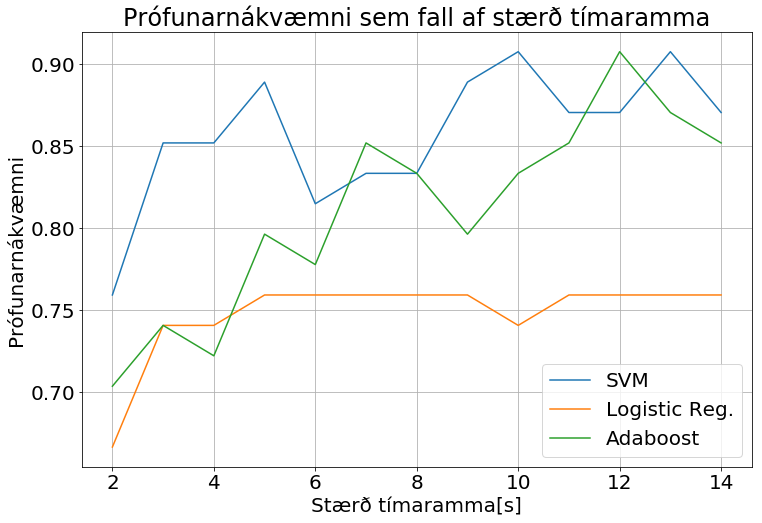

In [76]:
import matplotlib.pyplot as plt
timar = range(2,15)


Svm_time = scores_asl[2:,0,0]
LR_time = scores_asl[2:,1,0]
Ada_time = scores_asl[2: ,2,0]
print(scores_asl[2:,0,0])
Svm_time = np.append(Svm_time,np.array([0.9074074074074074,0.8703703703703703]))
LR_time = np.append(LR_time,np.array([0.7592592592592593,0.7592592592592593]))
Ada_time = np.append(Ada_time,np.array([0.8703703703703703,0.8518518518518519]))
plt.rcParams.update({'font.size':20})

plt.figure(figsize=(12,8))
plt.title('Prófunarnákvæmni sem fall af stærð tímaramma')
plt.xlabel('Stærð tímaramma[s]')
plt.ylabel('Prófunarnákvæmni')
plt.plot(timar, Svm_time, label = 'SVM')
plt.plot(timar, LR_time, label = 'Logistic Reg.')
plt.plot(timar, Ada_time, label = 'Adaboost')
#plt.plot(timar, scores_asl[2:,:,1], label = 'Train')
plt.legend()
plt.grid()
plt.savefig('test_acc_vs_tlength.PNG')
plt.savefig('test_acc_vs_tlength.PDF')

In [26]:
##########Reynum að nota Grid-search til að tune-a parametra
from sklearn.model_selection import GridSearchCV
tlength = 10# calculate features for each time interval of tlength seconds (must divide seizureLength) 11sec skilar besta
[X,y] = create_data_matrix(allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
X = StandardScaler().fit_transform(X)
print("X:", X.shape)
print("y:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X: (340, 2185)
y: (340,)


In [ ]:
# GÆÐAMAT Á FLOKKURUM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

[X,y] = create_data_matrix(allData, nrSeizures+100, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def GS(estimator, parameters):
    """ þarfnast að gögnin séu tilbúin """
    clf = GridSearchCV(estimator, parameters, cv = 5)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    sens = cm[1,1]/(cm[1,1] + cm[1,0])
    spec = cm[0,0]/(cm[0,0] + cm[0,1])

    return acc, sens, spec
tlength = 10# calculate features for each time interval of tlength seconds (must divide seizureLength) 10sec skilar besta
[X,y] = create_data_matrix(allData, nrSeizures+100, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

params_LR = {'C' : [0.5, 1, 5, 8, 10, 20] }

params_svm = {'C' : [0.5, 1, 5, 8, 10, 20],
              'gamma' : [0.0015, 0.01, 0.1, 1] }

params_ada = {'n_estimators' : [25, 50, 100, 150], 
              'learning_rate':[0.01, 0.1, 0.5, 1] }

compare_clf = np.zeros((3, 3))

compare_clf[0,:] = GS(LogisticRegression(), params_LR)
print('Logreg búin')
compare_clf[1,:] = GS(SVC(), params_svm)
print('SVC búin')
compare_clf[2,:] = GS(AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes = 4)), params_ada)

# plot comparison
plt.rcParams.update({'font.size': 20})

index = np.arange(3)
bar_width = 0.2

plt.figure(figsize = (18, 8))

plt.bar(index, compare_clf[0,:], bar_width, color='darkorange', label='LogReg')
plt.bar(index + bar_width, compare_clf[1,:], bar_width, color='darkcyan', label='SVM')
plt.bar(index + 2*bar_width, compare_clf[2,:], bar_width, color='darkmagenta', label='AdaBoost')
plt.grid(axis = 'y', linestyle = '-.', color = 'black')

plt.title('Samanburður á flokkurum')
plt.xticks(index + bar_width, ['Accuracy', 'Sensitivity', 'Specificity'])
plt.legend()
plt.show()

Logreg búin
SVC búin


In [31]:
clf_svm2 = svm.SVC(kernel='rbf')
parametersSvm2 = {'C' : [9,10,11,13,15], 
              'gamma':[0.0002,0.00015,0.00025]}
clf_svm_GS2 = GridSearchCV(clf_svm2, parametersSvm2, cv=5)
clf_svm_GS2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [9, 10, 11, 13, 15], 'gamma': [0.0002, 0.00015, 0.00025]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print('Score: ', clf_svm_GS2.score(X_test,y_test))
print(print('Bestu parametrar:',clf_svm_GS2.best_params_))

NameError: name 'clf_svm_GS2' is not defined

In [43]:
for tlength in range(1,14):
    clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
    [X,y] = create_data_matrix(allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf_ada.fit(X_train,y_train)
    print(tlength,clf_ada.score(X_test,y_test))
    
    

1 0.6470588235294118
2 0.611764705882353
3 0.6823529411764706
4 0.6
5 0.6941176470588235
6 0.7294117647058823
7 0.7529411764705882
8 0.788235294117647
9 0.788235294117647
10 0.788235294117647
11 0.8
12 0.7764705882352941
13 0.6941176470588235


In [52]:
for tlength in range(10,14):
    for max_depth in range(1,10):
        clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth))
        [X,y] = create_data_matrix(allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        clf_ada.fit(X_train,y_train)
        print('-'*50)
        print('tlength: ', tlength)
        print('max_depth: ', max_depth)
        print(clf_ada.score(X_test,y_test))

--------------------------------------------------
tlength:  10
max_depth:  1
0.8352941176470589
--------------------------------------------------
tlength:  10
max_depth:  2
0.8235294117647058
--------------------------------------------------
tlength:  10
max_depth:  3
0.788235294117647
--------------------------------------------------
tlength:  10
max_depth:  4
0.8235294117647058
--------------------------------------------------
tlength:  10
max_depth:  5
0.8
--------------------------------------------------
tlength:  10
max_depth:  6
0.8
--------------------------------------------------
tlength:  10
max_depth:  7
0.8235294117647058
--------------------------------------------------
tlength:  10
max_depth:  8
0.7058823529411765
--------------------------------------------------
tlength:  10
max_depth:  9
0.7058823529411765
--------------------------------------------------
tlength:  11
max_depth:  1
0.7411764705882353
--------------------------------------------------
tlength:  

In [12]:
##########Reynum að nota Grid-search til að tune-a parametra
from sklearn.model_selection import GridSearchCV
clf_ada2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))
parametersAda = {'n_estimators' : [50, 100, 25], 
              'learning_rate':[0.1,0.4,0.7,1,1.5]}
clf_ada_GS = GridSearchCV(clf_ada2, parametersAda, cv=5)
clf_ada_GS.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 25], 'learning_rate': [0.1, 0.4, 0.7, 1, 1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
print('Score: ', clf_ada_GS.score(X_test,y_test))
print(print('Bestu parametrar:',clf_ada_GS.best_params_))
### Keyrsla á gamla forritinu áður en Lxi var búinn að mixxa
### Score:  0.8
###Bestu parametrar: {'learning_rate': 1.5, 'n_estimators': 100}


Score:  0.8
Bestu parametrar: {'learning_rate': 1.5, 'n_estimators': 100}
None


Model sensitivity: 0.75
Model specificity: 0.7631578947368421
Matthews correlation coefficient  0.6447368421052632


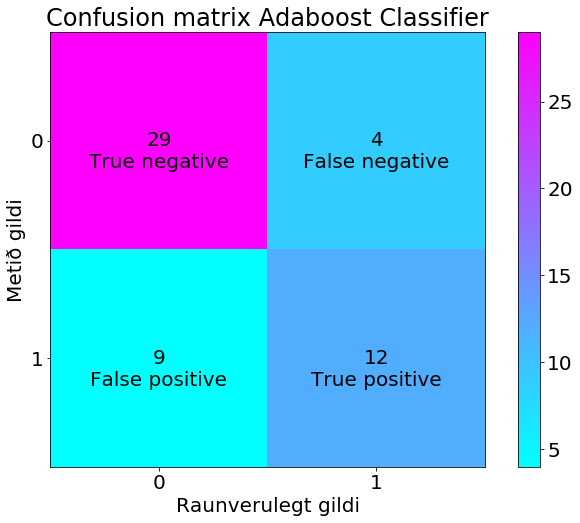

In [75]:
######### CONFUSION MATRIX
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test,clf_LR.predict(X_test))
plt.figure(figsize=(12,8))
plt.imshow(cm, cmap='cool')
plt.title('Confusion matrix Adaboost Classifier')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
blabb = ['True negative','False positive','False negative','True positive']
ind=0
for i in range(n):
    for j in range(p):        
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')
        plt.annotate(blabb[ind],xy=(i,j+0.1), horizontalalignment='center'
                     , verticalalignment='center')
        ind=ind+1
sens = cm[1,1]/(cm[1,1] + cm[1,0])
spec = cm[0,0]/(cm[0,0] + cm[0,1])

print('Model sensitivity:', sens)
print('Model specificity:', spec)

print('Matthews correlation coefficient ', metrics.matthews_corrcoef(y_test, clf_ada.predict(X_test)))

In [3]:
# FEATURES overlap

import numpy as np
from scipy import signal

# Hjorth parameters (time domain)
# https://en.wikipedia.org/wiki/Hjorth_parameters
def hjorth_mobility(x):
    num = np.var(np.diff(x))
    den = np.var(x)
    if den > 0:
        return np.sqrt(num / den)
    else:
        return 0.0

def hjorth_parameters(x):
    activity=np.var(x)
    mobility=hjorth_mobility(x)
    if mobility > 0:
        complexity=hjorth_mobility(np.diff(x)) / mobility
    else:
        complexity=0.0
    return np.array([activity, mobility, complexity])

#Calculates power spectral density for an eeg segment
#inputs: 
#signalMat: signal matrix for chunk
#fs: sampling density
#n: number of channels
#outputs: 
#f: frequency
#Pwelch: power spectral density calculated by Welch's method
def psd(signalMat,fs,n,fRange):
    Pwelch = np.zeros((n,fRange))
    for i in range(n):
        F,Pwelch[i,:] = signal.welch(signalMat[i,:],fs,scaling = 'spectrum')
    return(F,Pwelch)

# Absolute band power
# Combined power in M frequency bands
def absolute_power(f, PSD,M,l,h):
    length = (h-l)/M
    power = []
    k = l
    for i in range(M):
        power.append(sum(PSD[np.where((f > k) & (f <= k+length))]))
        k +=length
    return(power)
    
#Relative power of delta, theta, alpha 
#and beta waves for a single channel
def relative_power(f,PSD,M,l,h):
    absPow = absolute_power(f,PSD,M,l,h)
    tot = sum(PSD)
    if tot > 0.0:
        return(absPow/tot)
    else:
        return 0.0

# Calculate relative band power for the whole data set
# THINK: Might want to do the same for absolute power
def relative_power_all(allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit):
    dataPSD = np.zeros((nrSeizures*2,nrChannels,fRange))
    for i in range(nrSeizures*2):
        [F,dataPSD[i,:,:]] = psd(allData[i,:,:],fs,nrChannels,fRange)

    dataRelPower = np.zeros((nrSeizures*2,nrChannels,M))
    for i in range(nrSeizures*2):
        for j in range(nrChannels):
            dataRelPower[i,j,:] = relative_power(F,dataPSD[i,j,:],M,fLowerLimit,fUpperLimit)
    return(dataRelPower)
    
def create_data_matrix(allData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit, seizureLength, tlength, hjorth = True):
    
    assert tlength <= seizureLength, 'tlength more than seizureLength'
    numt = seizureLength - tlength + 1
    dataRelPower = np.zeros((nrSeizures*2, nrChannels, M, numt))
    k = 0
    while k+tlength <= seizureLength:
        tData = allData[:,:,k:int(k+tlength*fs-1)]
        dataRelPower[:,:,:,k] = relative_power_all(tData, nrSeizures, nrChannels, fRange, fs, M, fLowerLimit, fUpperLimit)
        k += 1
        
    dataRelPowerFlat = np.zeros((nrSeizures*2,nrChannels*M*numt))
    for i in range(nrSeizures*2):
        dataRelPowerFlat[i,:] = dataRelPower[i,:,:,:].flatten()
        
    if hjorth:
        hjopar = np.zeros((nrSeizures*2,nrChannels,3,numt))
        for i in range(nrSeizures*2):
            for j in range(nrChannels):
                k = 0
                while k+tlength <= seizureLength:
                    tData = allData[:,:,k:int(k+tlength*fs-1)]
                    hjopar[i,j,:,k] = hjorth_parameters(tData[i,j,:])
                    k += 1
                    
        hjoparflat = np.zeros((nrSeizures*2,nrChannels*3*numt))
        for i in range(nrSeizures*2):
            hjoparflat[i,:] = hjopar[i,:,:,:].flatten()
        dataRelPowerFlat = np.c_[dataRelPowerFlat, hjoparflat]
    
    
    X = dataRelPowerFlat
    y = np.concatenate((np.repeat(1,170),np.repeat(0,nrSeizures*2-170)))
        
    return(X,y)


In [57]:
# PATIENT SPECIFIC

# -*- coding: utf-8 -*-

# Patient-specific classifier

# Pre: Execute main.py

import ast
from sklearn import metrics

def fixIndex(i):
    if i < 10:
        i = '0'+str(i)
    return(str(i))

nonSeizureFileNames = open('nonSeizureFileNames.txt', 'r')
nonSeizureFileNames = nonSeizureFileNames.read().split('\n')

with open('seizureDict.txt', 'r') as f:
    s = f.read()
    seizureDict = ast.literal_eval(s)

patientResults = np.zeros((nrPatients+1, 7))

for testPatient in range(1,nrPatients+1):
    #gets index of seizures that belong to testPatient (+nrSeizures since seizure chunks are first in allData)
    prefix = 'chb'+fixIndex(testPatient)
    nonSeizIndices = [i+nrSeizures for i, s in enumerate(nonSeizureFileNames) if s.startswith(prefix)]
    testPatientKeys = [i for i in seizureDict.keys() if i.startswith(prefix)]
    k = 0
    seizIndices = []
    for key in seizureDict:    
        for i in range(len(seizureDict[key])):
            if key in testPatientKeys:
                seizIndices.append(k)
            k = k+1

    patientResults[testPatient-1,:3] = [testPatient, len(seizIndices), len(nonSeizIndices)]
    
    X_test = np.concatenate((X[seizIndices,:],X[nonSeizIndices,:]),axis = 0)
    y_test = np.concatenate((y[seizIndices],y[nonSeizIndices]))
    X_train = np.delete(X, nonSeizIndices, axis=0)
    X_train = np.delete(X_train, seizIndices, axis=0)
    y_train = np.delete(y,nonSeizIndices)
    y_train = np.delete(y_train,seizIndices)
    # THINK: Collect statistics on seizure/nonseizure
    
    # Classify individual patient
    # Insert code here ...
    clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=4))   # set classifier of choice
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    cm = metrics.confusion_matrix(y_test, y_pred)

    patientResults[testPatient-1, 3:7] = [clf.score(X_test, y_test),                  # Accuracy
                                          cm[1,1]/(cm[1,1] + cm[1,0]),                # Sens
                                          cm[0,0]/(cm[0,0] + cm[0,1]),                # Spec
                                          metrics.matthews_corrcoef(y_test, y_pred)]  # Matthew
    
    
patientResults[-1, 3:7] = np.mean(patientResults[:,3:7], axis = 0)

dash = '-' * 120
print(dash)
print('{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}'.format('Patient', '# Seizures', '# non Seizures', 'Accuracy', 'Sensitivity', 'Specificity', 'Matthew`s'))
print(dash)
for i in range(patientResults.shape[0]-1):
    print('{:^15d}{:^15d}{:^15d}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}'.format(int(patientResults[i,0]), 
                                                                             int(patientResults[i,1]), 
                                                                             int(patientResults[i,2]), 
                                                                             patientResults[i,3], 
                                                                             patientResults[i,4], 
                                                                             patientResults[i,5],
                                                                             patientResults[i,6]))
print(dash)
print('{:^15s}{:^15s}{:^15s}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}'.format('MEAN', '', '', 
                                                                         patientResults[-1, 3], 
                                                                         patientResults[-1, 4], 
                                                                         patientResults[-1, 5],
                                                                         patientResults[-1, 6]))

C:\Users\snati\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\snati\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


------------------------------------------------------------------------------------------------------------------------
    Patient      # Seizures   # non Seizures    Accuracy      Sensitivity    Specificity     Matthew`s   
------------------------------------------------------------------------------------------------------------------------
       1              7             11            0.722          0.286          1.000          0.443     
       2              2             15            0.941          1.000          0.933          0.789     
       3              7              5            0.750          0.571          1.000          0.598     
       4              4             14            0.778          0.500          0.857          0.357     
       5              4             15            0.842          1.000          0.800          0.676     
       6             10              3            0.923          0.900          1.000          0.822     
       7        

In [ ]:
print('Mean accuracy:', np.quantile(scores, 0.5))

In [17]:
seglength = 2
stepsize = 1

freq = int(fs*seglength / 2) + 1
time = int(seizureLength / stepsize)-1

spectroData = np.zeros((nrSeizures*2+200, freq, time, nrChannels))

for i in range(nrSeizures*2+200):
    for j in range(nrChannels):
        Sx = signal.spectrogram(allData[i, j, :], fs = fs, nperseg = fs*seglength, noverlap = fs*(seglength - stepsize))[2]
        spectroData[i, :, :, j] = 10 * np.log10(Sx)


C:\Users\snati\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


In [18]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense#, Activation
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import Adadelta
from tensorflow.python.keras.callbacks import EarlyStopping


X_train, X_test, y_train, y_test = train_test_split(spectroData, y, test_size=0.25, random_state=42)

# Convert to 32-bit floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#print(X_train[0,:10,:10,0])
#print(X_train[1,:10,:10,0])
print(X_train.shape)
num_classes = 1
num_epochs = 40
batch_size = 50
input_shape = X_train.shape[1:]

# set up early stopping
es = EarlyStopping(monitor='val_acc',
                   min_delta=0,
                   patience=6,
                   verbose=0, mode='auto')

nn = Sequential([ 
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape = input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = "same"),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = "same"),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid') ])

nn.summary()

nn.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

history = nn.fit(X_train, y_train,
                  #batch_size=batch_size,
                  epochs=num_epochs,
                  #callbacks = [es],
                  verbose=1,
                  validation_data=(X_test, y_test))
score = nn.evaluate(X_test, y_test, verbose=0)
print('val loss:', score[0])
print('val accuracy:', score[1])


C:\Users\snati\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(405, 257, 13, 23)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 257, 13, 32)       6656      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 257, 13, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 6, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 6, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 6, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 3, 64)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 3, 128)        73